## <div style="direction:ltr;text-align:left;">We will use Simple Linear Regression to predict amount of co2 emissions</div>

In [2]:
#import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.metrics import r2_score

In [4]:
# Read Data from csv file.
Data = pd.read_csv(r"..\Data\FuelConsumption.csv")
Data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [11]:
# Get required data.
required_data= Data[['ENGINESIZE','CO2EMISSIONS']]
# Separate train data and test.
mask = np.random.rand(len(Data)) < 0.8
train = required_data[mask]
test = required_data[~mask]
print(train)
print(test)

      ENGINESIZE  CO2EMISSIONS
0            2.0           196
3            3.5           255
4            3.5           244
5            3.5           230
6            3.5           232
...          ...           ...
1060         3.0           264
1061         3.2           258
1063         3.2           264
1065         3.2           260
1066         3.2           294

[835 rows x 2 columns]
      ENGINESIZE  CO2EMISSIONS
1            2.4           221
2            1.5           136
9            2.4           212
12           5.9           359
13           5.9           359
...          ...           ...
1035         1.8           189
1043         1.8           198
1047         3.6           248
1062         3.0           271
1064         3.0           271

[232 rows x 2 columns]


In [12]:
# Create 'LinearRegression' object.
reg = linear_model.LinearRegression()
# Get train data and make it into np array.
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x,train_y)
print(reg.coef_[0][0])
print(reg.intercept_[0])

39.0315020815593
126.07841938537337


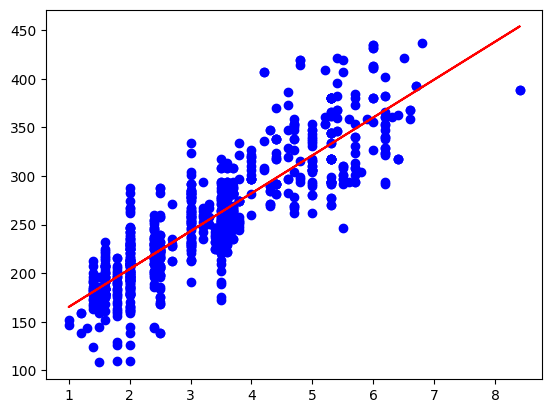

In [25]:
plt.scatter(train_x,train_y,color = "blue")
plt.plot(train_x,reg.intercept_[0]+reg.coef_[0][0]*train_x,"r-")
plt.show()

In [33]:
# Get test data and make into np array.
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
# Use your test data and predict amount of co2 emissions.
resulte = reg.predict(test_x)
r2 = r2_score(test_y,resulte)
print(r2.round(2))

0.79
